# Required Lab -- week of March 19th -- 23rd

Make an animated plot in matplotlib that recreates an analogue clock. 

Make the minute and hour markers in black.  Put numbers (text field) at the hour markers.  Make the hour hand short and fat, the minute hand long and thin, both in black.  Make the second hand in red. 

Set the time on your clock to local time -- use the **time** library. 

Make both a (normal) 12-hour version of your clock, and a 24-hour version. 

In [6]:
import tqdm
import time ## lets us have delays
%matplotlib nbagg  
##matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider
import matplotlib.animation as animation
from scipy.integrate import odeint


<IPython.core.display.Javascript object>


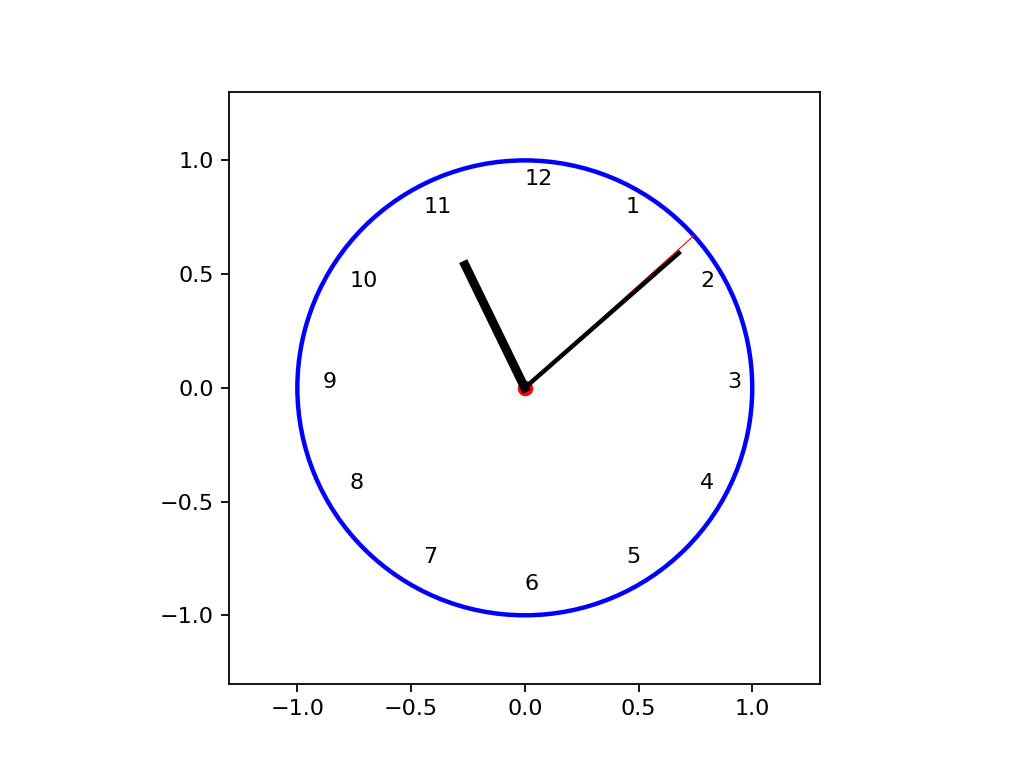

In [7]:

## let's now do an animated plot, to "see" the pendulum in action

plt.close()
fig, ax = plt.subplots()

## initial plot. bearing, initial arm, circle of radius 1.

circ = plt.Circle( (0.0, 0.0), 1.0, color='b', linewidth = 2, fill=False)
cent = plt.plot([0.0], [0.0], 'ro')
ax.add_artist(circ)
ax.set_xlim(-1.3, 1.3)
ax.set_ylim(-1.3, 1.3)
ax.set_aspect("equal")

##plt.text(-0.04, 0.9, "12")
#plt.text(0.9, 0, "3")
#plt.text(-0.04, -0.9, "6")
#plt.text(-0.9, -0, "9")
## set up arm

for hour in range(1,13):
    theta = np.pi/2 + 2*np.pi/12*hour
    x, y = -np.cos(theta)*0.89, np.sin(theta)*0.89
    plt.text(x, y, hour,)



second_hand = plt.plot([0, 0], [0, 1], 'r')[0] ## could say second_hand, = ... but using [0]
minute_hand = plt.plot([0, 0], [0, 1], 'k')[0]
hour_hand = plt.plot([0, 0], [0, 1], 'k')[0]

second_hand.set_linewidth(0.5)
minute_hand.set_linewidth(2)
hour_hand.set_linewidth(4)



def init():
    second_hand.set_xdata( [0, 0] )
    second_hand.set_ydata( [0, 1] )
    minute_hand.set_xdata( [0, 0] )
    minute_hand.set_ydata( [0, 1] )
    hour_hand.set_xdata( [0, 0] )
    hour_hand.set_ydata( [0, 1] )
    return [second_hand, minute_hand, hour_hand] ##could say return second_hand, but using [second_hand]

def animate(i):
    now = time.localtime()
    hour = now[3]
    minute = now[4]
    second = now[5]
    
    
    theta_sec = np.pi/2 + 2*np.pi/60*second
    theta_min =np.pi/2 +  2*np.pi/60*(second/60 + minute)
    theta_hr = np.pi/2 + 2*np.pi/12*(minute/60 + second/3600 + hour-7)

    second_hand.set_xdata( [0.0, -np.cos(theta_sec)] )
    second_hand.set_ydata( [0.0, np.sin(theta_sec)] )
    minute_hand.set_xdata( [0.0, -np.cos(theta_min)*0.9] )
    minute_hand.set_ydata( [0.0, np.sin(theta_min)*0.9] )
    hour_hand.set_xdata( [0.0, -np.cos(theta_hr)*0.6] )
    hour_hand.set_ydata( [0.0, np.sin(theta_hr)*0.6] )
    return [second_hand, minute_hand, hour_hand]
    
## interval is ms delay between frames
ani = animation.FuncAnimation( fig, animate, init_func=init, interval=20,\
                               blit=True )

plt.show()

In [4]:
time.localtime()

time.struct_time(tm_year=2018, tm_mon=3, tm_mday=24, tm_hour=2, tm_min=39, tm_sec=38, tm_wday=5, tm_yday=83, tm_isdst=0)

In [ ]:
plt.text?